In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
path_to_data = "../input/facial-expression-dataset/train/train/"




import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [3]:
img_dirs

['../input/facial-expression-dataset/train/train/surprise',
 '../input/facial-expression-dataset/train/train/fear',
 '../input/facial-expression-dataset/train/train/angry',
 '../input/facial-expression-dataset/train/train/neutral',
 '../input/facial-expression-dataset/train/train/sad',
 '../input/facial-expression-dataset/train/train/disgust',
 '../input/facial-expression-dataset/train/train/happy']

In [4]:
emotion = {}
for img_dir in img_dirs:
    emotion_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    emotion[emotion_name] = file_list


In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [6]:
class_dict = {}
count = 0
for emotion_name in emotion.keys():
    class_dict[emotion_name] = count
    count = count + 1
class_dict

{'surprise': 0,
 'fear': 1,
 'angry': 2,
 'neutral': 3,
 'sad': 4,
 'disgust': 5,
 'happy': 6}

In [7]:



import os
import cv2
rootdir = path_to_data
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        frame = cv2.imread(os.path.join(subdir, file)) 
        

In [8]:
import cv2
X, y = [], []

for emotion_name, training_files in emotion.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        #scalled_raw_img = cv2.resize(frame, (32, 32))
        #img_har = w2d(img,'db1',5)
        #scalled_img_har = cv2.resize(img_har, (32, 32))
        #combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1)))
        combined_img=img#scalled_raw_img
        X.append(combined_img)
        y.append(class_dict[emotion_name]) 

In [9]:
len(X[0])


48

In [10]:
X[0]


array([[[38, 38, 38],
        [44, 44, 44],
        [66, 66, 66],
        ...,
        [40, 40, 40],
        [48, 48, 48],
        [40, 40, 40]],

       [[39, 39, 39],
        [62, 62, 62],
        [67, 67, 67],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [42, 42, 42]],

       [[52, 52, 52],
        [64, 64, 64],
        [54, 54, 54],
        ...,
        [30, 30, 30],
        [41, 41, 41],
        [47, 47, 47]],

       ...,

       [[30, 30, 30],
        [38, 38, 38],
        [29, 29, 29],
        ...,
        [14, 14, 14],
        [19, 19, 19],
        [28, 28, 28]],

       [[24, 24, 24],
        [39, 39, 39],
        [36, 36, 36],
        ...,
        [13, 13, 13],
        [24, 24, 24],
        [26, 26, 26]],

       [[28, 28, 28],
        [33, 33, 33],
        [40, 40, 40],
        ...,
        [16, 16, 16],
        [26, 26, 26],
        [33, 33, 33]]], dtype=uint8)

In [11]:
y[0]


0

In [12]:
X1=np.array(X)
#X1 = X1.reshape(-1, 48,48)
y = np.array(y)
X1.shape

(28709, 48, 48, 3)

In [13]:
print(type(X)) 
# numpy.ndarray
print(type(X1)) 

<class 'list'>
<class 'numpy.ndarray'>


In [14]:
X1[0].shape

(48, 48, 3)

In [15]:
X1[0]


array([[[38, 38, 38],
        [44, 44, 44],
        [66, 66, 66],
        ...,
        [40, 40, 40],
        [48, 48, 48],
        [40, 40, 40]],

       [[39, 39, 39],
        [62, 62, 62],
        [67, 67, 67],
        ...,
        [42, 42, 42],
        [43, 43, 43],
        [42, 42, 42]],

       [[52, 52, 52],
        [64, 64, 64],
        [54, 54, 54],
        ...,
        [30, 30, 30],
        [41, 41, 41],
        [47, 47, 47]],

       ...,

       [[30, 30, 30],
        [38, 38, 38],
        [29, 29, 29],
        ...,
        [14, 14, 14],
        [19, 19, 19],
        [28, 28, 28]],

       [[24, 24, 24],
        [39, 39, 39],
        [36, 36, 36],
        ...,
        [13, 13, 13],
        [24, 24, 24],
        [26, 26, 26]],

       [[28, 28, 28],
        [33, 33, 33],
        [40, 40, 40],
        ...,
        [16, 16, 16],
        [26, 26, 26],
        [33, 33, 33]]], dtype=uint8)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=0)



In [17]:
len(X_train)
len(y_train)


21531

In [18]:
print(X_train.shape) 
print(y_train.shape) 

(21531, 48, 48, 3)
(21531,)


In [19]:
"""#X_train = X_train[:, 1:].reshape(X_train.shape[0],1,28).astype( 'float32' )
X_train = X_train / 255.0"""#

"#X_train = X_train[:, 1:].reshape(X_train.shape[0],1,28).astype( 'float32' )\nX_train = X_train / 255.0"

In [20]:
""" train set / data 
X_train=np.array(X_train)
x_train = X_train.reshape(-1,1, 32*32)
x_train = x_train.astype('float32') / 255

# train set / target 
y_train = tf.keras.utils.to_categorical(y_train , num_classes=7)"""#

" train set / data \nX_train=np.array(X_train)\nx_train = X_train.reshape(-1,1, 32*32)\nx_train = x_train.astype('float32') / 255\n\n# train set / target \ny_train = tf.keras.utils.to_categorical(y_train , num_classes=7)"

In [21]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models,Sequential
import matplotlib.pyplot as plt

In [22]:
X_train.shape


(21531, 48, 48, 3)

In [23]:
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(48, 48, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(1280, activation='relu'),
  layers.Dropout(0.5),
  
  layers.Dense(5280, activation='relu'),
  layers.Dropout(0.5),

  layers.Dense(7, activation='softmax')
])

2022-05-08 07:11:37.099899: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [24]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [25]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
epochs=30
history = model1.fit(
  X_train,
  y_train,
  epochs=epochs
)

2022-05-08 07:11:37.848355: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
/opt/conda/lib/python3.7/site-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


Epoch 1/30
673/673 [==============================] - 40s 58ms/step - loss: 1.7519 - accuracy: 0.2810
Epoch 2/30
673/673 [==============================] - 39s 58ms/step - loss: 1.5373 - accuracy: 0.3959
Epoch 3/30
673/673 [==============================] - 39s 59ms/step - loss: 1.3898 - accuracy: 0.4618
Epoch 4/30
673/673 [==============================] - 41s 61ms/step - loss: 1.2915 - accuracy: 0.5053
Epoch 5/30
673/673 [==============================] - 40s 59ms/step - loss: 1.2166 - accuracy: 0.5350
Epoch 6/30
673/673 [==============================] - 40s 59ms/step - loss: 1.1292 - accuracy: 0.5711
Epoch 7/30
673/673 [==============================] - 40s 59ms/step - loss: 1.0517 - accuracy: 0.6022
Epoch 8/30
673/673 [==============================] - 41s 60ms/step - loss: 0.9537 - accuracy: 0.6425
Epoch 9/30
673/673 [==============================] - 41s 60ms/step - loss: 0.8541 - accuracy: 0.6828
Epoch 10/30
673/673 [==============================] - 41s 62ms/step - loss: 0.757

In [27]:
loss_and_metrics = model1.evaluate(X_test,y_test)
print(loss_and_metrics)

225/225 [==============================] - 3s 14ms/step - loss: 2.0760 - accuracy: 0.5453
[2.0760364532470703, 0.5452772378921509]


In [28]:
import tensorflow as tf

from keras.models import load_model

model1.save('model_.h5')

In [29]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [30]:
import cv2
test= []

#for training_image in training_files:
img = cv2.imread('../input/sssssas/grey.jpg')
        #scalled_raw_img = cv2.resize(frame, (32, 32))
        #img_har = w2d(img,'db1',5)
        #scalled_img_har = cv2.resize(img_har, (32, 32))
        #combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1)))
test.append(img)
        

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


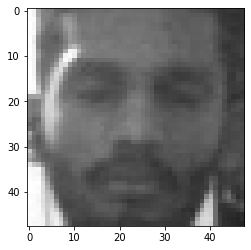

In [31]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(img)
plt.show()

In [32]:
test1=np.array(test)

In [33]:
test1.dtype

dtype('uint8')

In [34]:
test1.shape

(1, 48, 48, 3)

In [35]:
a=model1.predict(test1)

In [36]:
a

array([[0.01026844, 0.031598  , 0.05913617, 0.7359148 , 0.0055447 ,
        0.0087295 , 0.14880835]], dtype=float32)

In [37]:
emo=np.argmax(a)
emo

3